In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='NanumBarunGothic') # plt 폰트 지정

In [9]:
# 파일 직접 업로드
from google.colab import files
myfile = files.upload()

Saving A_company_data.csv to A_company_data.csv


In [11]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from google.colab import auth
auth.authenticate_user()

In [42]:
# 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
filename = '/content/drive/MyDrive/Colab Notebooks/A_company_data.csv'

data = pd.read_csv(filename, encoding='cp949')
data

,A회사 보습제 매출 데이터,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,9월,10월,11월,12월,1월,2월
1,총 매출,5280000,5501000,5469000,5480000,5533000,5554000
2,목표 매출,5280000,5500000,5729000,5968000,6217000,6476000
3,광고 비용,1056000,950400,739200,528000,316800,316800
4,소셜네트워크 비용,0,105600,316800,528000,739200,739200
5,1온스별 단가,2,2,2,1.9,1.9,1.9


In [5]:
data.columns

Index(['A회사 보습제 매출데이터', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [3]:
data = data.iloc[1:, 1:]
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,5280000,5501000,5469000,5480000,5533000,5554000
2,5280000,5500000,5729000,5968000,6217000,6476000
3,1056000,950400,739200,528000,316800,316800
4,0,105600,316800,528000,739200,739200
5,2,2,2,1.9,1.9,1.9


In [4]:
data = data.rename(index = {1:'총 매출', 2:'목표 매출', 3:'광고 비용', 4:'소셜네트워크 비용', 5:'1온스별 단가'})
data.columns = ['9월' ,'10월', '11월', '12월', '1월', '2월']
data

,9월,10월,11월,12월,1월,2월
총 매출,5280000,5501000,5469000,5480000,5533000,5554000
목표 매출,5280000,5500000,5729000,5968000,6217000,6476000
광고 비용,1056000,950400,739200,528000,316800,316800
소셜네트워크 비용,0,105600,316800,528000,739200,739200
1온스별 단가,2,2,2,1.9,1.9,1.9


In [5]:
data = data.transpose()
data

,총 매출,목표 매출,광고 비용,소셜네트워크 비용,1온스별 단가
9월,5280000,5280000,1056000,0,2
10월,5501000,5500000,950400,105600,2
11월,5469000,5729000,739200,316800,2
12월,5480000,5968000,528000,528000,1.9
1월,5533000,6217000,316800,739200,1.9
2월,5554000,6476000,316800,739200,1.9


In [6]:
data['총 매출'] = pd.to_numeric(data['총 매출'])
data['목표 매출'] = pd.to_numeric(data['목표 매출'])
data['광고 비용'] = pd.to_numeric(data['광고 비용'])
data['소셜네트워크 비용'] = pd.to_numeric(data['소셜네트워크 비용'])
data['1온스별 단가'] = pd.to_numeric(data['1온스별 단가'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 9월 to 2월
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총 매출       6 non-null      int64  
 1   목표 매출      6 non-null      int64  
 2   광고 비용      6 non-null      int64  
 3   소셜네트워크 비용  6 non-null      int64  
 4   1온스별 단가    6 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 460.0+ bytes


In [7]:
# 총 매출
ts = data.iloc[:, 0:1]
ts

,총 매출
9월,5280000
10월,5501000
11월,5469000
12월,5480000
1월,5533000
2월,5554000


In [8]:
# 목표 매출
ps = data.iloc[:, 1:2]
ps

,목표 매출
9월,5280000
10월,5500000
11월,5729000
12월,5968000
1월,6217000
2월,6476000


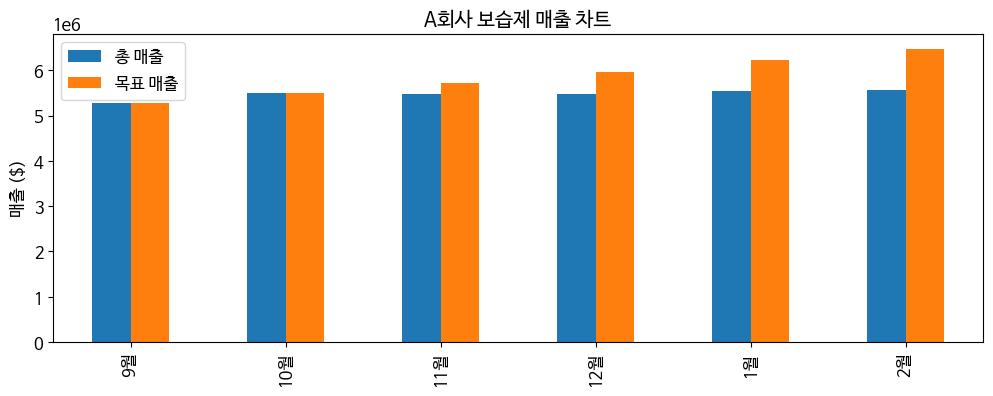

In [19]:
data_s = data.iloc[:, 0:2]

sc = data_s.plot(kind='bar', title='A회사 보습제 매출 차트', figsize=(12,4), legend=True, fontsize=12)
sc.set_ylabel('매출 ($)', fontsize=12)
sc.legend(['총 매출', '목표 매출'], fontsize=12)

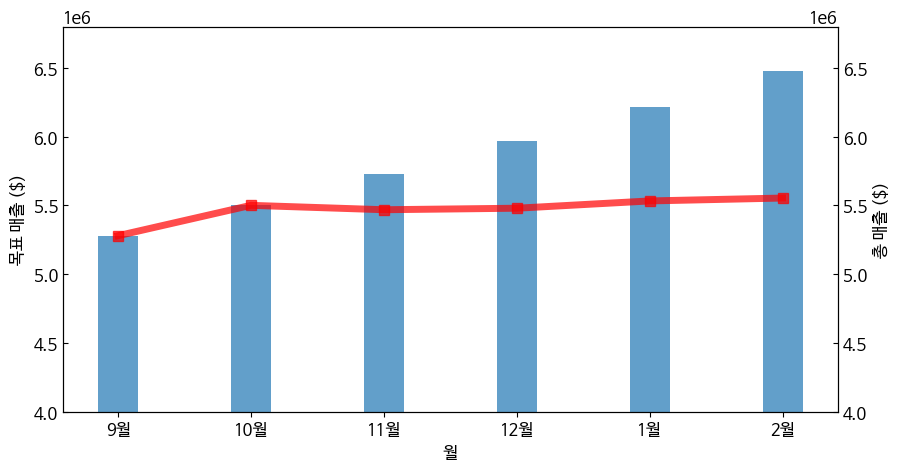

In [52]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

x = np.array(['9월','10월','11월','12월','1월','2월'])
y1 = np.array([5280000,	5501000,	5469000,	5480000,	5533000,	5554000])
y2 = np.array([5280000,	5500000,	5729000,	5968000,	6217000,	6476000])

fig, ts1 = plt.subplots()

ts1.bar(x, y2, label = '목표 매출', alpha=0.7, width=0.3)
ts1.set_ylim(4000000, 6800000)
ts1.set_xlabel('월')
ts1.set_ylabel("목표 매출 ($)")
ts1.tick_params(axis='y', direction='in')

ts2 = ts1.twinx()
ts2.plot(x, y1, '-s', color='red', markersize=7, linewidth=5, alpha=0.7)
ts2.set_ylim(4000000, 6800000)
ts2.set_ylabel('총 매출 ($)')
ts2.tick_params(axis='both', direction='in')

plt.show()

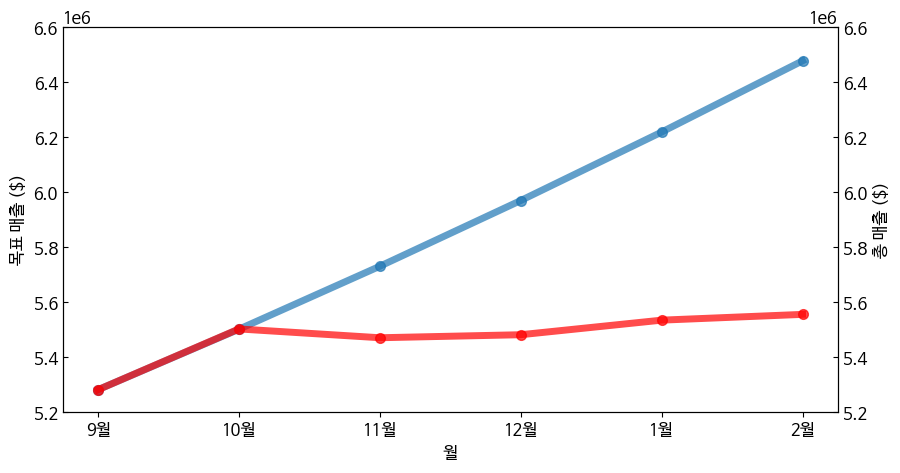

In [50]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

x = np.array(['9월','10월','11월','12월','1월','2월'])
y1 = np.array([5280000,	5501000,	5469000,	5480000,	5533000,	5554000])
y2 = np.array([5280000,	5500000,	5729000,	5968000,	6217000,	6476000])

fig, ts1 = plt.subplots()

ts1.plot(x, y2, '-o', markersize=7, alpha=0.7, linewidth=5)
ts1.set_ylim(5200000, 6600000)
ts1.set_xlabel('월')
ts1.set_ylabel("목표 매출 ($)")
ts1.tick_params(axis='y', direction='in')

ts2 = ts1.twinx()
ts2.plot(x, y1, '-o', color='red', markersize=7, linewidth=5, alpha=0.7)
ts2.set_ylim(5200000, 6600000)
ts2.set_ylabel('총 매출 ($)')
ts2.tick_params(axis='both', direction='in')

plt.show()

In [29]:
# 광고 비용
ac = data.iloc[:, 2:3]
ac

,광고 비용
9월,1056000
10월,950400
11월,739200
12월,528000
1월,316800
2월,316800


In [30]:
# sns 비용
sc = data.iloc[:, 3:4]
sc

,소셜네트워크 비용
9월,0
10월,105600
11월,316800
12월,528000
1월,739200
2월,739200


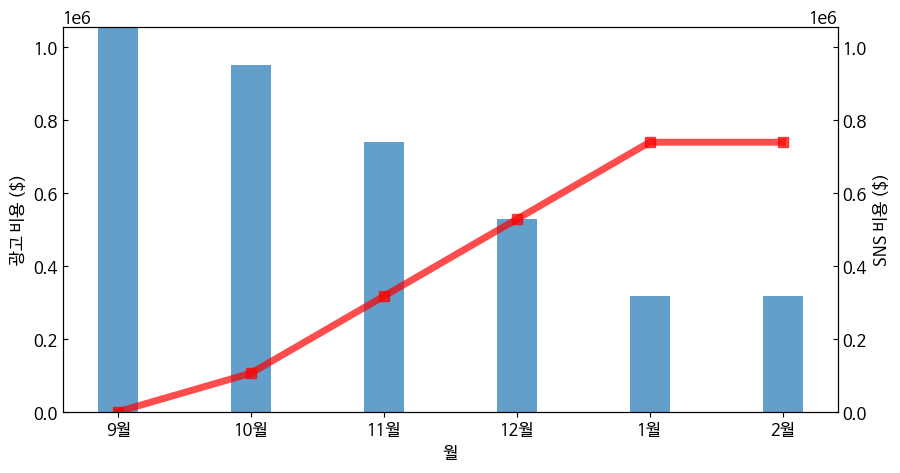

In [36]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

x = np.array(['9월','10월','11월','12월','1월','2월'])
y1 = np.array([1056000,	950400,	739200,	528000,	316800,	316800])
y2 = np.array([0,	105600,	316800,	528000,	739200,	739200])

fig, ts1 = plt.subplots()

ts1.bar(x, y1, label = '목표 매출', alpha=0.7, width=0.3)
ts1.set_ylim(0, 1056000)
ts1.set_xlabel('월')
ts1.set_ylabel("광고 비용 ($)")
ts1.tick_params(axis='y', direction='in')

ts2 = ts1.twinx()
ts2.plot(x, y2, '-s', color='red', markersize=7, linewidth=5, alpha=0.7)
ts2.set_ylim(0, 1056000)
ts2.set_ylabel('SNS 비용 ($)')
ts2.tick_params(axis='both', direction='in')

plt.show()

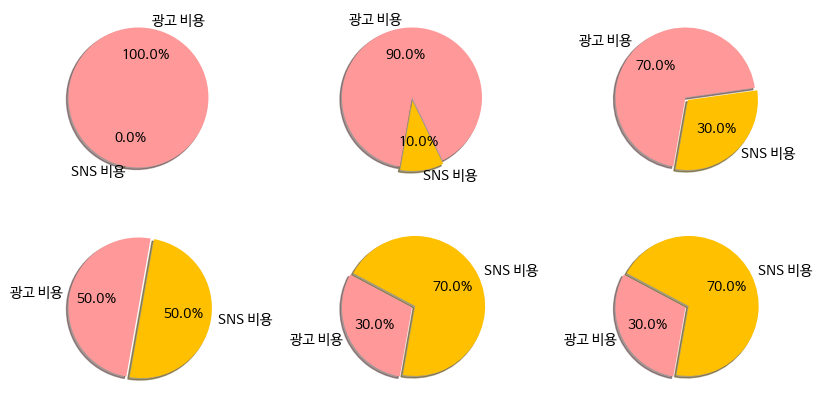

In [43]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] =10

ratio = [100, 0]
labels = ['광고 비용', 'SNS 비용']
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,1)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)


ratio = [90, 10]
labels = ['광고 비용', 'SNS 비용']
explode = [0, 0.05]
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,2)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)

ratio = [70, 30]
labels = ['광고 비용', 'SNS 비용']
explode = [0, 0.05]
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,3)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)

ratio = [50, 50]
labels = ['광고 비용', 'SNS 비용']
explode = [0, 0.05]
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,4)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)

ratio = [30, 70]
labels = ['광고 비용', 'SNS 비용']
explode = [0, 0.05]
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,5)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)

ratio = [30, 70]
labels = ['광고 비용', 'SNS 비용']
explode = [0, 0.05]
colors = ['#ff9999', '#ffc000']

plt.subplot(2,3,6)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)


plt.show()

In [53]:
# 단가
up = data.iloc[:, 4]
up

9월     2.0
10월    2.0
11월    2.0
12월    1.9
1월     1.9
2월     1.9
Name: 1온스별 단가, dtype: float64

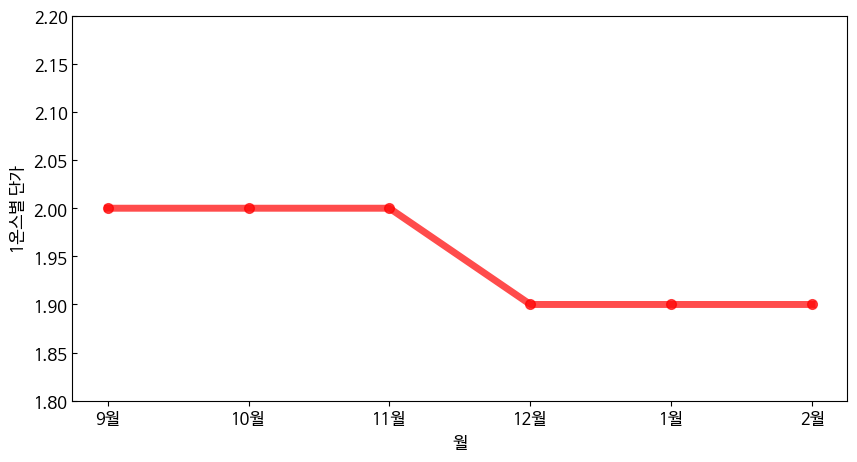

In [59]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

x = np.array(['9월','10월','11월','12월','1월','2월'])
y1 = np.array([2.0, 2.0, 2.0, 1.9, 1.9, 1.9])

fig, ts1 = plt.subplots()

ts1.plot(x, y1, '-ro', markersize=7, alpha=0.7, linewidth=5)
ts1.set_ylim(1.8, 2.2)
ts1.set_xlabel('월')
ts1.set_ylabel("1온스별 단가")
ts1.tick_params(axis='y', direction='in')

plt.show()